In [1]:
from numpy import loadtxt
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('data/train.csv',index_col = 0)

In [3]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,,,,,,,,,,,,,,,,,,,,,
1,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
2,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
3,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
4,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
5,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1472,0,3.0,0,4,1,20,0.3,169,2,...,443,892,797,6,1,11,1,1,0,0
1497,1868,1,0.5,0,2,1,40,0.9,179,8,...,576,884,298,8,2,17,1,1,0,0
1498,1375,0,2.9,0,2,0,20,0.4,147,6,...,596,679,3847,8,0,12,1,0,1,3


In [4]:
def nomallize(df): #min-max normalization
    return (df-df.min())/(df.max()-df.min())


In [5]:
Y_train = df_train.iloc[:, -1]
Y_train = np.array(Y_train)
df_train=nomallize(df=df_train)

In [6]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,,,,,,,,,,,,,,,,,,,,,
1,0.227789,0.0,0.68,0.0,0.055556,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010262,0.170895,0.612567,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333
2,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.464341,0.993324,0.634492,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667
3,0.041416,1.0,0.00,1.0,0.111111,1.0,0.629032,0.888889,0.541667,0.571429,...,0.648025,0.811749,0.627005,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667
4,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.623910,0.858478,0.671390,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667
5,0.881764,1.0,0.28,0.0,0.722222,1.0,0.677419,0.555556,0.508333,0.142857,...,0.619805,0.475300,0.308289,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.648631,0.0,1.00,0.0,0.222222,1.0,0.290323,0.222222,0.741667,0.142857,...,0.227296,0.261682,0.144118,0.071429,0.055556,0.500000,1.0,1.0,0.0,0.000000
1497,0.913160,1.0,0.00,0.0,0.111111,1.0,0.612903,0.888889,0.825000,1.000000,...,0.295536,0.256342,0.010695,0.214286,0.111111,0.833333,1.0,1.0,0.0,0.000000
1498,0.583834,0.0,0.96,0.0,0.111111,0.0,0.290323,0.333333,0.558333,0.714286,...,0.305798,0.119493,0.959626,0.214286,0.000000,0.555556,1.0,0.0,1.0,1.000000


In [7]:
X_train = df_train.iloc[:, :-1]
X_train = np.array(X_train)

In [8]:
X_train

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.58383434, 0.        , 0.96      , ..., 1.        , 0.        ,
        1.        ],
       [0.25384102, 0.        , 0.2       , ..., 1.        , 1.        ,
        1.        ],
       [0.82899132, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [9]:
Y_train


array([1, 2, 2, ..., 3, 1, 2], dtype=int64)

In [10]:
def correlation(X, y):
    n_samples, n_features = X.shape

    # Compute the mean of X and y
    X_mean = np.mean(X, axis=0)
    y_mean = np.mean(y)

    # Compute the covariance matrix
    cov_mat = np.zeros((n_features, n_features))
    for i in range(n_features):
        for j in range(n_features):
            cov_mat[i, j] = np.sum((X[:, i] - X_mean[i]) * (X[:, j] - X_mean[j])) / (n_samples - 1)

    # Compute the correlation matrix
    corr_mat = np.zeros((n_features,))
    for i in range(n_features):
        corr_mat[i] = np.sum((X[:, i] - X_mean[i]) * (y - y_mean)) / np.sqrt(np.sum((X[:, i] - X_mean[i])**2) * np.sum((y - y_mean)**2))
    return corr_mat

In [11]:
corr = correlation(X_train,Y_train)
corr

array([ 0.18903833,  0.02871585, -0.00849849,  0.02670289,  0.02508987,
        0.02249368,  0.0517983 , -0.00312229, -0.03108667,  0.00621786,
        0.03638936,  0.13454539,  0.15303343,  0.91895849,  0.02565342,
        0.04195442,  0.02449601,  0.03705732, -0.02626952,  0.02070309])

In [12]:
X_train.shape

(1500, 20)

In [13]:
Y_train.shape

(1500,)

In [14]:


class LinearRegression:
    def __init__(self, learning_rate=0.001):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        # Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Perform gradient descent
        mse=1
        cache_mse = 0
        while cache_mse!= mse:
            cache_mse = mse
            y_predicted = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            mse = np.mean((y_predicted - y)**2)
            self.loss_history.append(mse)
            print(mse)

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [47]:
model = LinearRegression(learning_rate=0.08)

In [48]:
model.fit(X_train, Y_train)

3.5193333333333334
1.8081123420105158
1.3214037506369232
1.1755734980663486
1.1247575524772429
1.1005437327671288
1.0838937746141966
1.0695072007221273
1.055905998021483
1.0426757964756637
1.0296982574868998
1.0169374922681584
1.0043806324353357
0.9920212916987218
0.9798549615957357
0.9678777278352371
0.9560859106665655
0.9444759624475413
0.9330444368708356
0.9217879782200716
0.9107033162865792
0.8997872629449339
0.8890367092701412
0.8784486228821274
0.8680200454267406
0.8577480901648066
0.8476299396582841
0.837662843547564
0.8278441164154887
0.8181711357342148
0.8086413398913188
0.799252226291732
0.7900013495322584
0.7808863196455746
0.7719048004107535
0.7630545077274883
0.7543332080513173
0.7457387168872762
0.7372688973395137
0.7289216587145279
0.7206949551757701
0.712586784447479
0.7045951865656931
0.6967182426744855
0.6889540738655489
0.6813008400593475
0.6737567389261231
0.6663200048451237
0.658988907900498
0.6517617529123582
0.6446368785015874
0.6376126561870278
0.630687489513744

0.10311563658664352
0.10310799494880628
0.1031003807004274
0.10309279373545065
0.10308523394832829
0.1030777012340175
0.10307019548797672
0.10306271660616234
0.10305526448502506
0.10304783902150653
0.10304044011303595
0.10303306765752668
0.10302572155337286
0.10301840169944622
0.10301110799509271
0.10300384034012927
0.10299659863484074
0.10298938277997653
0.10298219267674757
0.10297502822682315
0.10296788933232788
0.10296077589583863
0.1029536878203815
0.10294662500942879
0.10293958736689619
0.10293257479713952
0.1029255872049523
0.10291862449556241
0.10291168657462951
0.10290477334824209
0.10289788472291483
0.10289102060558565
0.10288418090361309
0.10287736552477346
0.1028705743772584
0.10286380736967188
0.10285706441102786
0.10285034541074745
0.10284365027865651
0.1028369789249829
0.10283033126035411
0.10282370719579463
0.10281710664272346
0.10281052951295161
0.10280397571867986
0.10279744517249606
0.10279093778737278
0.10278445347666518
0.10277799215410827
0.10277155373381484
0.1027

0.1010424556060824
0.10104207490539964
0.10104169552266012
0.10104131745329714
0.10104094069275972
0.10104056523651284
0.10104019108003705
0.10103981821882864
0.10103944664839962
0.10103907636427739
0.10103870736200499
0.10103833963714093
0.10103797318525905
0.10103760800194861
0.10103724408281411
0.10103688142347539
0.10103652001956744
0.1010361598667403
0.10103580096065927
0.10103544329700456
0.10103508687147143
0.10103473167977005
0.1010343777176255
0.10103402498077756
0.101033673464981
0.10103332316600519
0.10103297407963419
0.10103262620166667
0.10103227952791588
0.10103193405420963
0.1010315897763902
0.10103124669031426
0.10103090479185281
0.10103056407689129
0.10103022454132933
0.1010298861810808
0.10102954899207377
0.10102921297025036
0.10102887811156684
0.10102854441199349
0.10102821186751458
0.10102788047412825
0.10102755022784657
0.10102722112469543
0.1010268931607145
0.10102656633195724
0.10102624063449067
0.10102591606439561
0.10102559261776635
0.10102527029071079
0.101024

0.10093789614432028
0.1009378771929361
0.10093785830704305
0.10093783948641465
0.10093782073082537
0.10093780204005028
0.10093778341386538
0.10093776485204732
0.10093774635437365
0.10093772792062256
0.10093770955057312
0.10093769124400512
0.10093767300069909
0.10093765482043629
0.10093763670299881
0.1009376186481695
0.10093760065573186
0.10093758272547029
0.1009375648571698
0.10093754705061617
0.10093752930559598
0.10093751162189647
0.10093749399930577
0.1009374764376125
0.1009374589366062
0.10093744149607708
0.10093742411581608
0.10093740679561483
0.10093738953526576
0.10093737233456193
0.10093735519329718
0.10093733811126598
0.10093732108826362
0.100937304124086
0.10093728721852985
0.10093727037139244
0.10093725358247192
0.10093723685156693
0.10093722017847695
0.1009372035630022
0.10093718700494345
0.10093717050410218
0.1009371540602807
0.10093713767328188
0.1009371213429092
0.10093710506896704
0.10093708885126022
0.10093707268959444
0.10093705658377594
0.10093704053361165
0.10093702

0.10093269046368956
0.100932689497008
0.10093268853366438
0.10093268757364719
0.1009326866169449
0.1009326856635461
0.1009326847134394
0.10093268376661337
0.1009326828230567
0.10093268188275814
0.10093268094570637
0.10093268001189021
0.10093267908129851
0.10093267815392008
0.1009326772297439
0.10093267630875884
0.10093267539095394
0.10093267447631812
0.10093267356484054
0.10093267265651021
0.10093267175131636
0.10093267084924804
0.10093266995029454
0.10093266905444508
0.1009326681616889
0.10093266727201543
0.10093266638541389
0.10093266550187373
0.10093266462138437
0.1009326637439353
0.10093266286951598
0.10093266199811597
0.10093266112972485
0.10093266026433219
0.1009326594019277
0.100932658542501
0.1009326576860418
0.10093265683253994
0.1009326559819851
0.10093265513436715
0.10093265428967595
0.10093265344790144
0.10093265260903342
0.10093265177306196
0.10093265093997703
0.10093265010976867
0.10093264928242687
0.10093264845794185
0.10093264763630368
0.10093264681750251
0.100932646001

0.10093242354681067
0.10093242350166212
0.10093242345666943
0.10093242341183202
0.10093242336714935
0.10093242332262091
0.10093242327824616
0.10093242323402453
0.1009324231899556
0.10093242314603873
0.10093242310227346
0.1009324230586592
0.1009324230151955
0.10093242297188182
0.10093242292871764
0.10093242288570245
0.10093242284283571
0.1009324228001169
0.10093242275754555
0.10093242271512115
0.10093242267284314
0.10093242263071106
0.10093242258872442
0.10093242254688269
0.10093242250518539
0.10093242246363195
0.10093242242222197
0.1009324223809549
0.10093242233983028
0.10093242229884758
0.10093242225800635
0.10093242221730607
0.10093242217674629
0.10093242213632644
0.10093242209604614
0.10093242205590487
0.10093242201590213
0.10093242197603745
0.10093242193631038
0.10093242189672041
0.10093242185726707
0.10093242181794994
0.10093242177876847
0.10093242173972226
0.10093242170081082
0.10093242166203366
0.10093242162339032
0.10093242158488037
0.10093242154650332
0.10093242150825878
0.100

0.10093241118685542
0.1009324111843636
0.10093241118188041
0.1009324111794058
0.10093241117693971
0.10093241117448212
0.10093241117203304
0.1009324111695924
0.10093241116716016
0.10093241116473632
0.10093241116232085
0.10093241115991372
0.1009324111575149
0.10093241115512433
0.10093241115274204
0.10093241115036797
0.10093241114800207
0.10093241114564434
0.10093241114329475
0.10093241114095328
0.10093241113861988
0.10093241113629449
0.10093241113397718
0.10093241113166786
0.10093241112936649
0.10093241112707306
0.10093241112478754
0.10093241112250992
0.10093241112024018
0.10093241111797825
0.10093241111572412
0.10093241111347777
0.10093241111123918
0.1009324111090083
0.10093241110678514
0.10093241110456963
0.10093241110236177
0.10093241110016153
0.10093241109796888
0.1009324110957838
0.10093241109360626
0.10093241109143622
0.10093241108927367
0.1009324110871186
0.10093241108497095
0.10093241108283076
0.10093241108069789
0.10093241107857238
0.10093241107645425
0.10093241107434339
0.10093

0.10093241050334727
0.10093241050321389
0.10093241050308094
0.10093241050294847
0.10093241050281646
0.10093241050268492
0.1009324105025538
0.10093241050242314
0.10093241050229293
0.1009324105021632
0.10093241050203387
0.10093241050190502
0.1009324105017766
0.10093241050164864
0.10093241050152112
0.10093241050139401
0.10093241050126735
0.10093241050114113
0.10093241050101535
0.10093241050089
0.1009324105007651
0.10093241050064063
0.10093241050051657
0.10093241050039295
0.10093241050026976
0.10093241050014694
0.10093241050002458
0.10093241049990267
0.10093241049978117
0.10093241049966008
0.10093241049953942
0.10093241049941916
0.10093241049929931
0.10093241049917989
0.10093241049906089
0.10093241049894226
0.10093241049882408
0.10093241049870628
0.10093241049858892
0.10093241049847196
0.10093241049835536
0.1009324104982392
0.10093241049812343
0.10093241049800805
0.1009324104978931
0.10093241049777853
0.10093241049766433
0.10093241049755056
0.10093241049743715
0.10093241049732415
0.1009324

0.10093241046674567
0.10093241046673856
0.10093241046673145
0.10093241046672438
0.10093241046671737
0.10093241046671034
0.10093241046670334
0.10093241046669638
0.1009324104666894
0.10093241046668247
0.10093241046667559
0.1009324104666687
0.10093241046666185
0.10093241046665503
0.10093241046664822
0.10093241046664142
0.10093241046663468
0.10093241046662796
0.10093241046662123
0.10093241046661454
0.10093241046660786
0.10093241046660122
0.10093241046659462
0.10093241046658799
0.10093241046658145
0.10093241046657488
0.10093241046656837
0.10093241046656186
0.10093241046655536
0.10093241046654888
0.10093241046654244
0.10093241046653603
0.10093241046652963
0.10093241046652326
0.10093241046651692
0.10093241046651057
0.10093241046650428
0.100932410466498
0.10093241046649173
0.10093241046648549
0.10093241046647927
0.10093241046647307
0.10093241046646688
0.10093241046646072
0.1009324104664546
0.10093241046644846
0.1009324104664424
0.10093241046643629
0.10093241046643023
0.1009324104664242
0.10093

0.10093241046479287
0.10093241046479248
0.10093241046479212
0.10093241046479173
0.10093241046479136
0.10093241046479098
0.10093241046479061
0.10093241046479022
0.10093241046478985
0.10093241046478947
0.10093241046478912
0.10093241046478872
0.10093241046478836
0.10093241046478803
0.10093241046478765
0.10093241046478729
0.1009324104647869
0.10093241046478654
0.10093241046478617
0.10093241046478582
0.10093241046478547
0.10093241046478511
0.10093241046478477
0.1009324104647844
0.10093241046478404
0.10093241046478368
0.10093241046478335
0.10093241046478299
0.10093241046478264
0.1009324104647823
0.10093241046478196
0.1009324104647816
0.10093241046478126
0.1009324104647809
0.10093241046478058
0.10093241046478024
0.10093241046477991
0.10093241046477958
0.10093241046477923
0.1009324104647789
0.10093241046477855
0.10093241046477822
0.10093241046477787
0.10093241046477756
0.10093241046477723
0.10093241046477688
0.10093241046477658
0.10093241046477625
0.10093241046477594
0.1009324104647756
0.10093

In [17]:
model.loss_history[-1]

0.10093241046470447

In [18]:
len(model.loss_history)

13144

In [19]:
min(model.loss_history)

0.10093241046470447

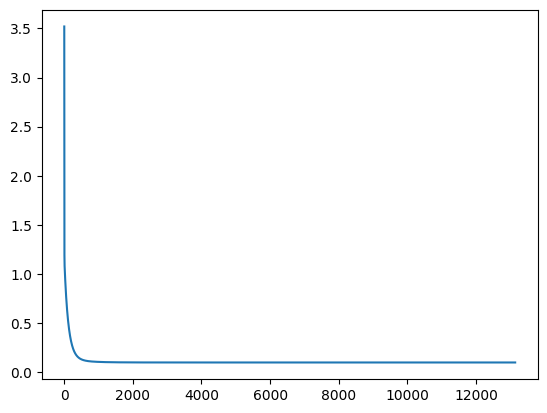

In [20]:
plt.plot(model.loss_history)

In [21]:
model.weights

array([ 7.47404221e-01, -1.16496190e-03, -3.42009063e-02, -1.53751772e-02,
        1.87281872e-02, -9.12345550e-03,  3.67709264e-02, -1.84160567e-02,
       -1.01711746e-01,  9.83346104e-04,  1.77826330e-03,  5.53786640e-01,
        4.14399227e-01,  3.53192786e+00,  1.30921228e-02, -1.68633143e-02,
       -6.67308653e-03,  4.08082984e-02, -9.30790281e-03, -1.42123623e-02])

In [22]:
model.bias

-0.9760664247979189

In [23]:
model.predict(X_train[1])

2.177024455636867

Text(0.5, 0, 'price_range')

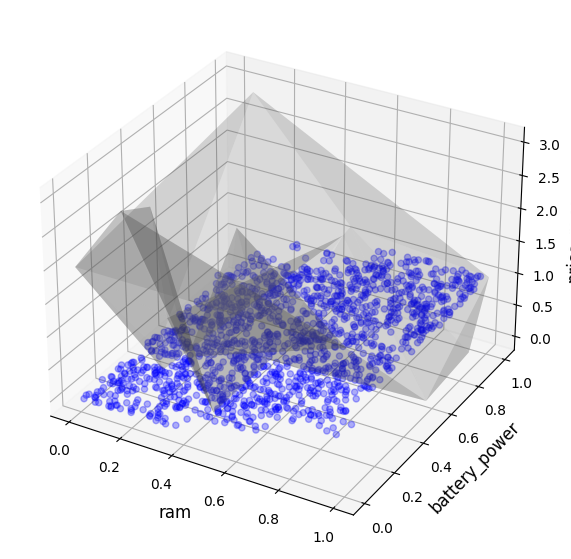

In [24]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter(df_train['ram'], df_train['battery_power'], df_train['price_range'], alpha = 0.3, c = 'blue')
ax.plot_trisurf(X_train[13], X_train[0], Y_train, color = 'grey',alpha = 0.2)
ax.set_xlabel('ram', fontsize=12)
ax.set_ylabel('battery_power', fontsize=12)
ax.set_zlabel('price_range', fontsize=12)

In [25]:
df_val = pd.read_csv('data/val.csv',index_col = 0)
Y_val = df_val.iloc[:, -1]
Y_val = np.array(Y_val)

df_val=nomallize(df=df_val)

X_val = df_val.iloc[:, :-1]
X_val = np.array(X_val)

In [26]:
X_val.shape

(500, 20)

In [27]:
Y_val.shape

(500,)

In [28]:
X_val

array([[0.48393574, 0.        , 0.08      , ..., 1.        , 0.        ,
        0.        ],
       [0.98259705, 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.45783133, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.94310576, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.67603748, 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00535475, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [29]:
y_pred=model.predict(X_val)

In [30]:
y_pred = model.predict(X_val)
mse = np.mean((y_pred - Y_val)**2)
print('Mean squared error:', mse)

Mean squared error: 0.10474277641038703


In [31]:
df_test = pd.read_csv('data/test.csv',index_col = 0)
df_test_default = pd.read_csv('data/test.csv',index_col = 0)


In [32]:
df_test.shape

(1000, 20)

In [33]:
df_test=nomallize(df=df_test)
X_test = df_test.iloc[:, :]
X_test = np.array(X_test)

In [34]:
X_test.shape

(1000, 20)

In [35]:
X_test.shape

(1000, 20)

In [36]:
y_pred = model.predict(X_test)
y_pred = abs(np.around(y_pred))


In [37]:
y_pred

array([3., 3., 2., 3., 1., 3., 4., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 2., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       1., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 2., 0., 3., 1., 3., 1., 1., 3., 3., 3., 0., 1., 1., 1., 1., 2.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 0., 2., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 0.,
       0., 3., 1., 2., 0., 1., 2., 3., 3., 2., 1., 3., 3., 3., 3., 2., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 2., 2., 1., 1., 2., 1., 1., 3., 1.,
       1., 0., 3., 2., 1., 2., 1., 2., 2., 3., 3., 2., 2., 3., 2., 3., 1.,
       0., 3., 2., 4., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       1., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 1., 0., 1., 1., 2., 2.,
       1., 0., 0., 0., 1., 1., 3., 1., 1., 2., 2., 2., 3., 1., 2., 2., 2.,
       3., 2., 2., 1., 1., 0., 1., 2., 1., 2., 3., 3., 0., 2., 0., 3., 2.,
       2., 3., 1., 0., 1.

In [38]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,0.362241,1.0,0.52,1.0,0.736842,0.0,0.048387,0.000000,0.941667,0.285714,0.80,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000,0.0,1.0,0.0
2,0.227485,1.0,0.00,1.0,0.210526,1.0,0.951613,0.777778,0.925000,0.571429,0.60,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778,1.0,0.0,0.0
3,0.871915,1.0,0.92,0.0,0.052632,0.0,0.403226,0.888889,0.883333,0.285714,0.20,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444,0.0,1.0,1.0
4,0.697799,0.0,0.00,1.0,0.947368,1.0,0.370968,0.444444,0.133333,1.000000,1.00,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778,1.0,1.0,0.0
5,0.623082,0.0,0.36,0.0,0.578947,1.0,0.758065,0.444444,0.233333,0.714286,0.90,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.800534,1.0,0.56,0.0,0.000000,1.0,0.838710,0.444444,0.750000,0.857143,0.85,0.337703,0.275217,0.498658,0.642857,0.444444,0.722222,1.0,1.0,0.0
997,0.072715,0.0,0.52,1.0,0.000000,0.0,0.177419,0.888889,0.883333,0.428571,0.10,0.604090,0.755511,0.448202,0.214286,0.055556,0.944444,0.0,1.0,1.0
998,0.456971,0.0,0.36,0.0,0.052632,1.0,0.096774,0.444444,0.000000,0.000000,0.60,0.250131,0.216433,0.257649,0.000000,0.000000,0.666667,1.0,0.0,0.0


In [39]:
df_test_default

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0


In [40]:
df_test_default['pre']=y_pred

In [41]:
df_test_default

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,pre
id,,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3.0
2,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3.0
3,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2.0
4,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3.0
5,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2.0
997,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1.0
998,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,1.0


In [42]:
df_test_default.to_csv('Result.csv')